In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 as pretrainedModel , preprocess_input

In [4]:
from tensorflow.keras.layers import Flatten ,Dense

In [5]:
from tensorflow.keras.models import Model

In [6]:
from tensorflow.keras.preprocessing import image

In [7]:
train_path='/content/gdrive/MyDrive/data/train'

In [8]:
valid_path='/content/gdrive/MyDrive/data/test'

In [11]:
image_size=[75,75]

In [12]:
from glob import glob
imagefiles= glob(train_path+  '/*/*.jpeg')

In [13]:
imagefiles

['/content/gdrive/MyDrive/data/train/ill/1.jpeg',
 '/content/gdrive/MyDrive/data/train/ill/2.jpeg',
 '/content/gdrive/MyDrive/data/train/ill/3.jpeg',
 '/content/gdrive/MyDrive/data/train/ill/4.jpeg',
 '/content/gdrive/MyDrive/data/train/ill/5.jpeg',
 '/content/gdrive/MyDrive/data/train/ill/6.jpeg',
 '/content/gdrive/MyDrive/data/train/normal/1.jpeg',
 '/content/gdrive/MyDrive/data/train/normal/2.jpeg',
 '/content/gdrive/MyDrive/data/train/normal/3.jpeg',
 '/content/gdrive/MyDrive/data/train/normal/4.jpeg',
 '/content/gdrive/MyDrive/data/train/normal/5.jpeg',
 '/content/gdrive/MyDrive/data/train/normal/6.jpeg']

In [14]:
validfiles= glob(valid_path+  '/*/*.jpeg')

In [15]:
folders=glob(train_path+'/*')

In [16]:
folders

['/content/gdrive/MyDrive/data/train/ill',
 '/content/gdrive/MyDrive/data/train/normal']

In [17]:
import matplotlib.pyplot as plt
import numpy as np

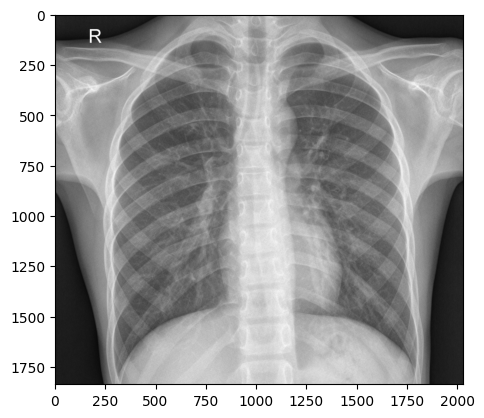

In [18]:
plt.imshow(image.load_img(np.random.choice(imagefiles)))   #image was in preprocessing

In [19]:
ptm=pretrainedModel(
    input_shape=image_size+[3],
    weights= 'imagenet',
    include_top= False
)

87910968/87910968 [==============================] - 1s 0us/step


In [20]:
ptm.trainable= False

In [21]:
k=len(folders)
k

2

In [22]:
x=Flatten()(ptm.output)
x=Dense(k, activation='softmax')(x)
model= Model(inputs=ptm.input, outputs=x)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
gen=ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function= preprocess_input


)

batchsize=128

In [25]:
train_generator= gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=image_size,
    batch_size=batchsize

)


valid_generator= gen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size=image_size,
    batch_size=batchsize

)

Found 12 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r=model.fit_generator(train_generator, validation_data=valid_generator, epochs=20)

<ipython-input-26-9fab2c22d606>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(train_generator, validation_data=valid_generator, epochs=20)


Epoch 1/20
1/1 [==============================] - 14s 14s/step - loss: 1.1485 - accuracy: 0.3333 - val_loss: 0.6066 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 398ms/step - loss: 0.8270 - accuracy: 0.5833 - val_loss: 1.4071 - val_accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 411ms/step - loss: 0.7709 - accuracy: 0.5833 - val_loss: 2.1276 - val_accuracy: 0.4167
Epoch 4/20
1/1 [==============================] - 0s 396ms/step - loss: 0.7722 - accuracy: 0.5833 - val_loss: 1.8218 - val_accuracy: 0.4167
Epoch 5/20
1/1 [==============================] - 0s 392ms/step - loss: 0.6969 - accuracy: 0.6667 - val_loss: 1.3965 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 385ms/step - loss: 0.7277 - accuracy: 0.5833 - val_loss: 1.0025 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 1s 572ms/step - loss: 0.6162 - accuracy: 0.5833 - val_loss: 1.2778 - val_accuracy: 0.4167
Epoch 8/20
1/1 [=====

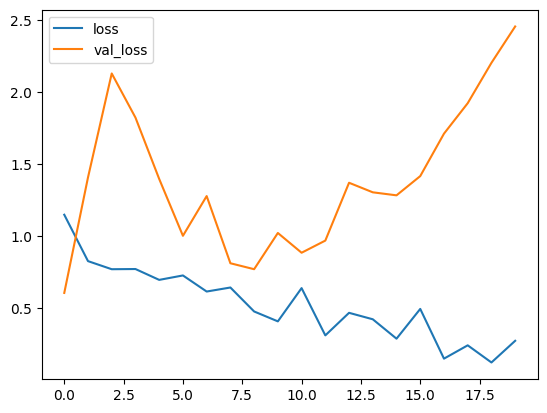

In [27]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

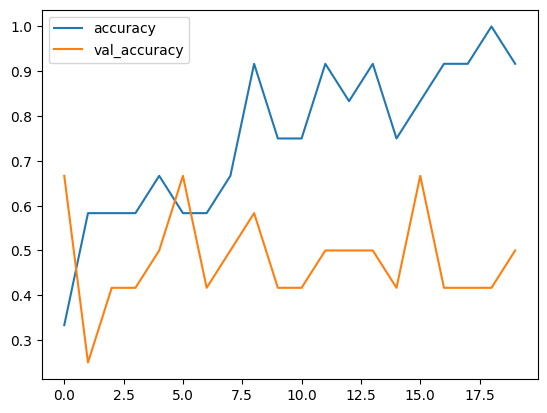

In [28]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [36]:
pp=model.predict(valid_generator)

1/1 [==============================] - 0s 286ms/step


In [34]:
len(validfiles)

12

In [38]:
pp[6]

array([9.999349e-01, 6.504119e-05], dtype=float32)

In [40]:
labels=[]
for i in range(12):
  x=np.argmax(pp[i, :])
  labels.append(x)

labels


[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]

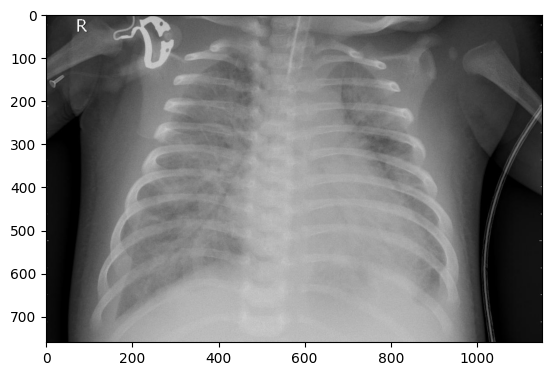

In [42]:
plt.imshow(image.load_img(validfiles[0]))